Task 3: Mapping and regression

In [22]:
#!/usr/bin/env python
# vim: set fileencoding=utf-8 :
# By AB

# Library imports
# ============================================================================

import re
import os, sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# change the font size and tick pad
plt.rc('mathtext', fontset='stixsans')

plt.rcParams['xtick.major.pad'] = 25
plt.rcParams['ytick.major.pad'] = 25

plt.rcParams.update({'font.size' : 30})
font = {'fontsize'   : 35}
font1 = {'fontsize'   : 30}

In [23]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


Download the NO2 data set The file contains monthly averaged NO2 measurements done by the SCIAMACHY satellite instrument from 2002 to 2012, in units of molecules per cm² (this is the vertically integrated NO2 content of the atmosphere above a given ground area, i.e., it is a column-averaged quantity). There are four variables in the file:

    vcdtrop_no2 -> the NO2 concentration in a given grid cell (i.e., 1.5° x 1.5° square region) in a given month
    lat -> geographical latitude of the center of the grid cell
    lon -> geographical longitude of the center of the grid cell
    time -> the time of measurement (days since 1992-12-31T00:00:00)

Task 3.1

Use the xarray.open_dataset function to load the NO2 dataset. Resample the monthly values to annual means.

Hint: The xarray.DataArray object is very similar to pandas objects, so many methods of pandas DataFrames also exist for xarray.

Hint: Remember to properly treat missing / NaN values.

In [24]:
import xarray as xr

ds = xr.open_dataset("/home/andres2085/Downloads/no2_sciamachy.nc")
ds;

In [25]:
no2arr = ds['vcdtrop_no2']
annually_avg = no2arr.resample('A', dim='time', how='mean', skipna=True)

Task 3.2

Plot a global map of the 2010 average NO2 concentration.

Select a region of your choice, and plot the same data for this region only.

Note: You expect high values over East Asia, Europe, and North America.


In [26]:
ds = xr.open_dataset("/home/andres2085/Downloads/no2_sciamachy.nc")

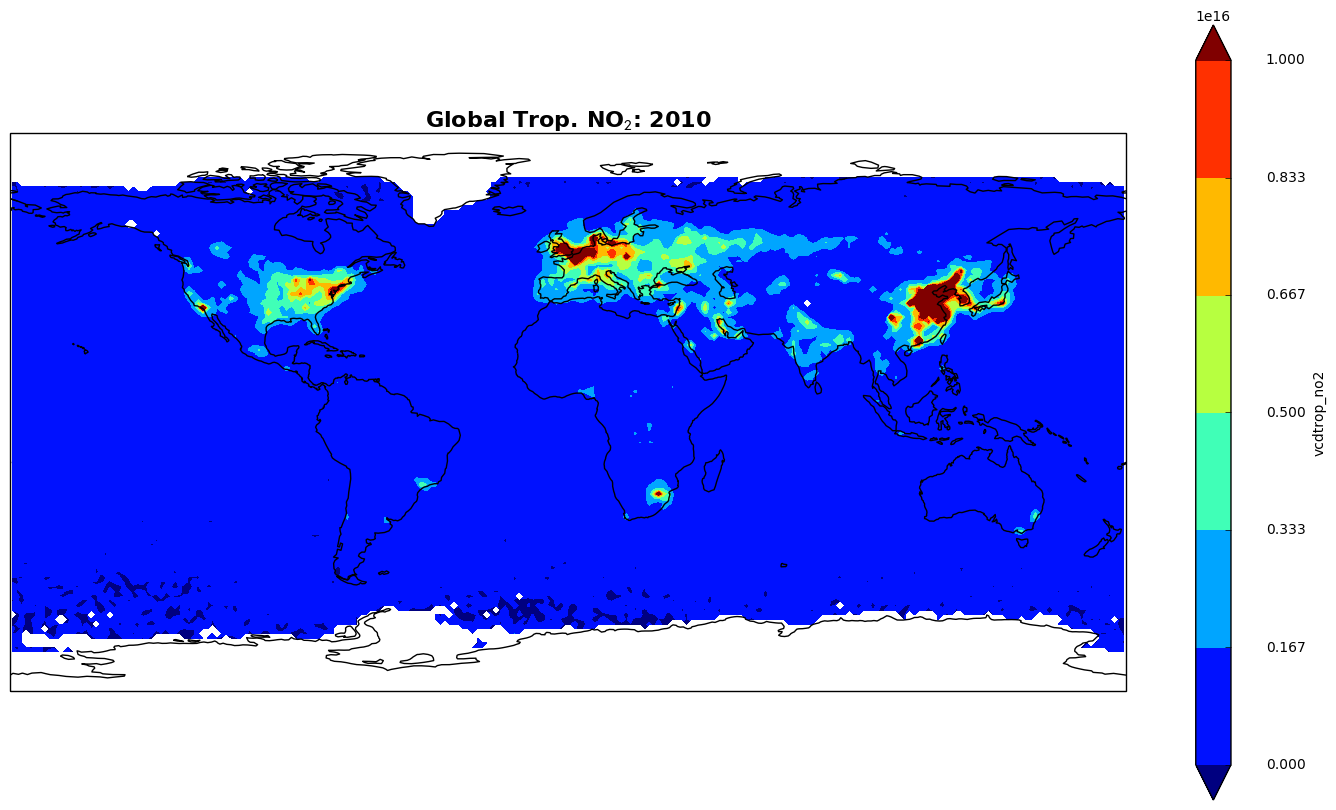

In [27]:
import cartopy

fig, ax = plt.subplots(1, 2, figsize=(18, 10))

ax = plt.axes(projection=cartopy.crs.PlateCarree(central_longitude=0.0, globe=None))
annually_avg.isel(time=8).plot.contourf(ax=ax, 
                                        transform=cartopy.crs.PlateCarree(), 
                                        cmap='jet', vmin=0, vmax=1e16);
#cmap.ax.set_ylabel('# of contacts', rotation=270)
ax.set_global(); ax.coastlines(); 
ax.set_title('Global Trop. NO$_2$: 2010', size=16, fontweight='bold');

plt.show()

part II: Select a region of your choice, and plot the same data for this region only, Task 3.2

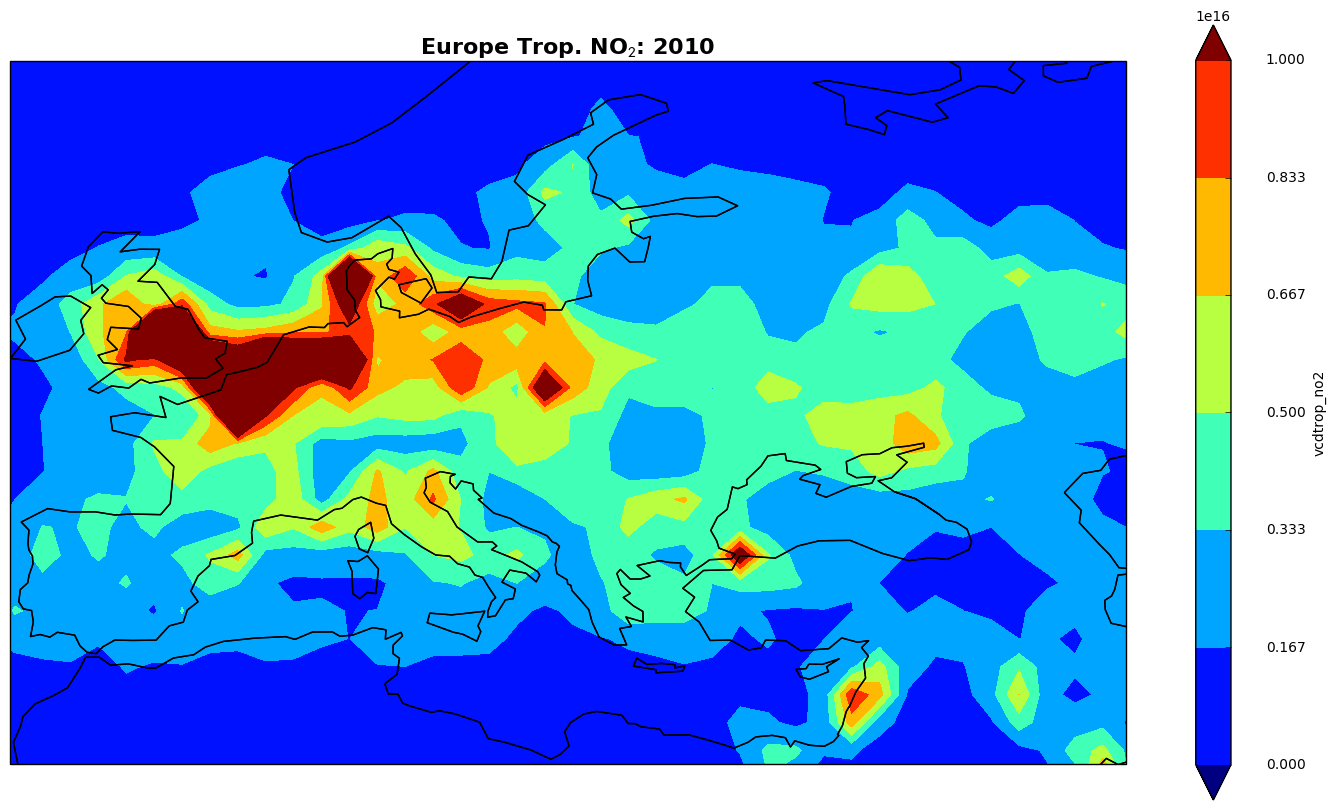

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(18, 10))

ax = plt.axes(projection=cartopy.crs.PlateCarree(central_longitude=0.0, globe=None))
annually_avg.isel(time=8).plot.contourf(ax=ax, transform=cartopy.crs.PlateCarree(), cmap='jet', vmin=0,vmax=1e16);
ax.set_global(); ax.coastlines(); 

ax.set_extent((-10, 50, 30, 65))
ax.stock_img()
ax.add_feature(cartopy.feature.COASTLINE)
ax.set_title('Europe Trop. NO$_2$: 2010', size=16, fontweight='bold');


plt.show()